In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline
import scipy.stats
import pylab
from sklearn.preprocessing import PowerTransformer

# Import Data

In [22]:
df = pd.read_csv('Car data.csv')

# EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

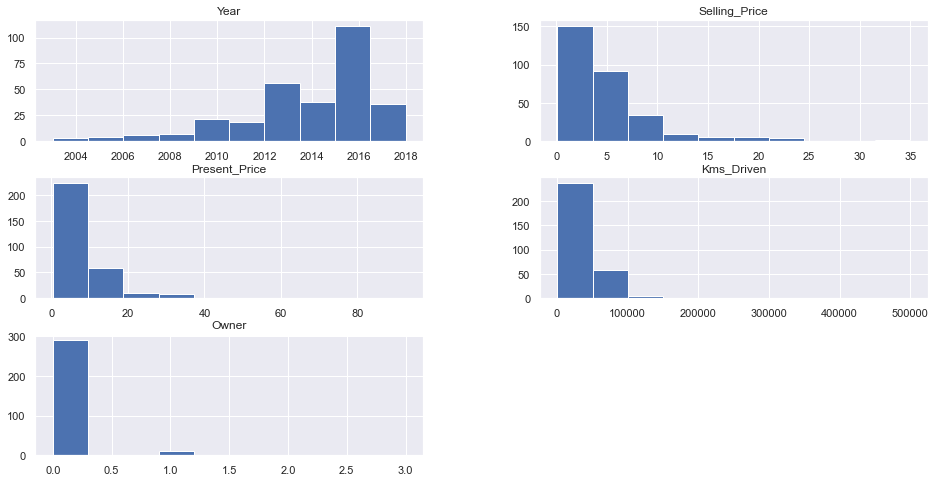

In [25]:
df.hist(figsize = (16,8))

# Yeo-Johnson Transformation

Works with positive and negative values.

In [26]:
pt = PowerTransformer(method = 'yeo-johnson', standardize = False)

### Selling Price

In [27]:
df['yj_Selling_Price'] = pt.fit_transform(df[['Selling_Price']])

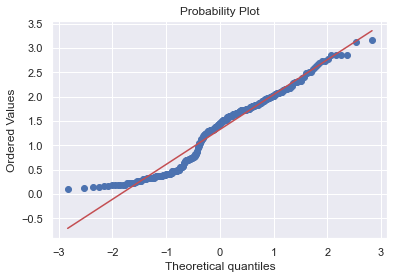

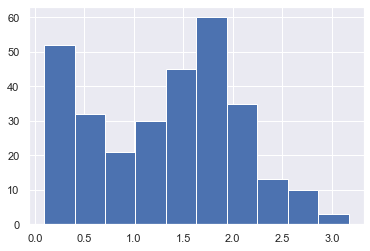

In [28]:
scipy.stats.probplot(df.yj_Selling_Price, plot = pylab)
pylab.show()
plt.hist(df.yj_Selling_Price)
plt.show()

### Kms_Driven

In [29]:
df['yj_Kms_Driven'] = pt.fit_transform(df[['Kms_Driven']])

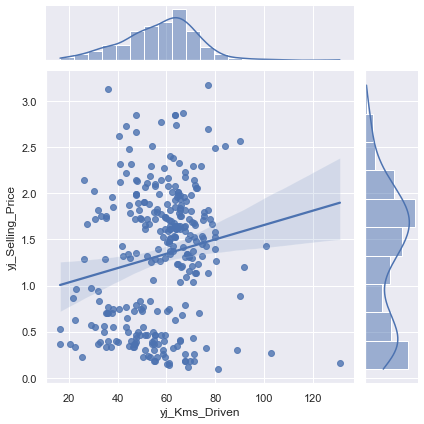

In [30]:
sns.jointplot( x ='yj_Kms_Driven',y ='yj_Selling_Price', data = df, kind = 'reg')

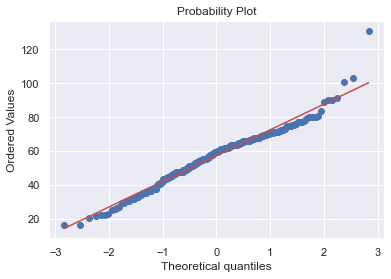

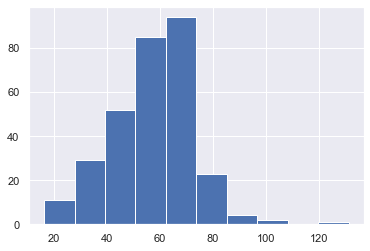

In [31]:
scipy.stats.probplot(df.yj_Kms_Driven, plot = pylab)
pylab.show()
plt.hist(df.yj_Kms_Driven)
plt.show()

### Present_Price

In [32]:
df['yj_Present_Price'] = pt.fit_transform(df[['Present_Price']])

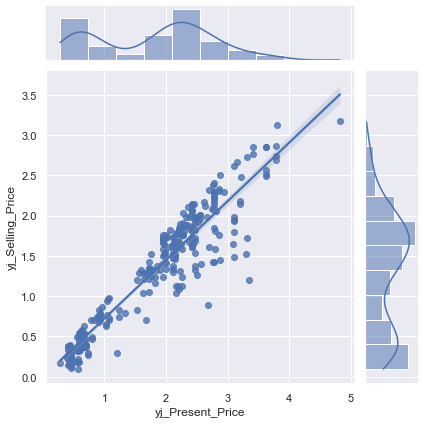

In [33]:
sns.jointplot( x ='yj_Present_Price',y ='yj_Selling_Price', data = df, kind = 'reg')

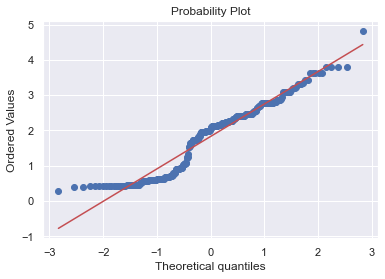

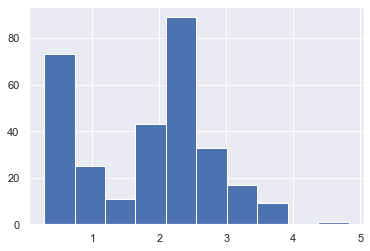

In [34]:
scipy.stats.probplot(df.yj_Present_Price, plot = pylab)
pylab.show()
plt.hist(df.yj_Present_Price)
plt.show()

<AxesSubplot:>

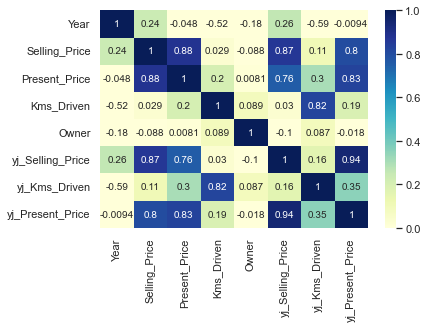

In [35]:
#Correlation Analysis
sns.heatmap(df.corr(),annot = True,vmin=0, vmax=1, cmap="YlGnBu")